In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("produits_complet.csv")
df.head()


,Nom,Prix,Catégorie,Note,Nb_avis,En_stock,Lien,Site
0,Support PC de bureau à roulettes – Blanc – MDF...,40.0,Informatique,NaN,NaN,Oui,https://tdiscount.tn/produit/informatique/acce...,Tdiscount
1,PC Portable HP 15-fd0297nk Intel Celeron N100 ...,789.0,Informatique,NaN,NaN,Oui,https://tdiscount.tn/produit/informatique/pc-p...,Tdiscount
2,HP TAPIS GAMING OMEN 100,60031.9,Informatique,NaN,NaN,Oui,https://tdiscount.tn/produit/informatique/acce...,Tdiscount
3,Boîtier verbatim Store ‘n’ Go pour disque dur ...,42.0,Informatique,NaN,NaN,Oui,https://tdiscount.tn/produit/informatique/comp...,Tdiscount
4,Pc Portable MSI Modern 15 F13MG i3 13ème Gén 8...,1409.0,Informatique,NaN,NaN,Oui,https://tdiscount.tn/produit/informatique/pc-p...,Tdiscount


In [4]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom        1165 non-null   object 
 1   Prix       1165 non-null   float64
 2   Catégorie  1165 non-null   object 
 3   Note       0 non-null      float64
 4   Nb_avis    0 non-null      float64
 5   En_stock   1165 non-null   object 
 6   Lien       1165 non-null   object 
 7   Site       1165 non-null   object 
dtypes: float64(3), object(5)
memory usage: 72.9+ KB


Nom             0
Prix            0
Catégorie       0
Note         1165
Nb_avis      1165
En_stock        0
Lien            0
Site            0
dtype: int64

In [5]:
df = df.drop(columns=['Lien'])

In [6]:
df = df.drop(columns=['Site'])

In [7]:
df.columns

Index(['Nom', 'Prix', 'Catégorie', 'Note', 'Nb_avis', 'En_stock'], dtype='object')

In [8]:
df.head()

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock
0,Support PC de bureau à roulettes – Blanc – MDF...,40.0,Informatique,NaN,NaN,Oui
1,PC Portable HP 15-fd0297nk Intel Celeron N100 ...,789.0,Informatique,NaN,NaN,Oui
2,HP TAPIS GAMING OMEN 100,60031.9,Informatique,NaN,NaN,Oui
3,Boîtier verbatim Store ‘n’ Go pour disque dur ...,42.0,Informatique,NaN,NaN,Oui
4,Pc Portable MSI Modern 15 F13MG i3 13ème Gén 8...,1409.0,Informatique,NaN,NaN,Oui


In [9]:
Pour remplir les valeurs manquantes NAN  Note et Nb_avis

In [18]:
import numpy as np
import pandas as pd

# Exemple : ton DataFrame simulé
# df = pd.read_csv('ton_fichier.csv')  # si tu as déjà un CSV

# Vérifie toutes les catégories présentes dans le dataset
print("Catégories uniques :", df['Catégorie'].unique())

# Définir les valeurs médianes par catégorie
median_notes = {
    'Informatique': 4.2,
    'Électroménager': 4.1,
    'Beauté': 4.5,
    'Accessoires': 4.3,
    'Téléphonie': 4.0   # ajout de Téléphonie
}

median_nb_avis = {
    'Informatique': 50,
    'Électroménager': 30,
    'Beauté': 60,
    'Accessoires': 40,
    'Téléphonie': 45   # ajout de Téléphonie
}

# Écart type pour variation autour de la médiane
std_notes = 0.3   # petites variations pour les notes
std_nb_avis = 15  # petites variations pour le nombre d'avis

# Remplir Note et Nb_avis pour chaque catégorie
for cat in df['Catégorie'].unique():
    mask = df['Catégorie'] == cat
    
    # Notes réalistes autour de la médiane
    df.loc[mask, 'Note'] = np.clip(
        np.random.normal(loc=median_notes[cat], scale=std_notes, size=mask.sum()),
        3.0, 5.0
    ).round(1)
    
    # Nb_avis réalistes autour de la médiane
    df.loc[mask, 'Nb_avis'] = np.clip(
        np.random.normal(loc=median_nb_avis[cat], scale=std_nb_avis, size=mask.sum()),
        0, 200
    ).astype(int)

# Vérification
print(df.head(10))
print(df[['Catégorie','Note','Nb_avis']].describe())


Catégories uniques : ['Informatique' 'Électroménager' 'Téléphonie' 'Beauté']
                                                 Nom     Prix     Catégorie  \
0  Support PC de bureau à roulettes – Blanc – MDF...     40.0  Informatique   
1  PC Portable HP 15-fd0297nk Intel Celeron N100 ...    789.0  Informatique   
2                           HP TAPIS GAMING OMEN 100  60031.9  Informatique   
3  Boîtier verbatim Store ‘n’ Go pour disque dur ...     42.0  Informatique   
4  Pc Portable MSI Modern 15 F13MG i3 13ème Gén 8...   1409.0  Informatique   
5           Mini Caméra Surveillance WIFI Full HD A9     45.0  Informatique   
6             Barette mémoire ADATA 8Go DDR4 2400MHz    199.0  Informatique   
7                              SAC À DOS MUNICH LIMA     99.0  Informatique   
8                 SAC À DOS AVEC CHARIOT MUNICH LIMA    159.9  Informatique   
9  Disque dur 3.5″ Western Digital Caviar Blue 50...     49.0  Informatique   

   Note  Nb_avis En_stock  
0   4.3     46.0      Oui

In [20]:
df.head()

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock
0,Support PC de bureau à roulettes – Blanc – MDF...,40.0,Informatique,4.3,46.0,Oui
1,PC Portable HP 15-fd0297nk Intel Celeron N100 ...,789.0,Informatique,3.8,51.0,Oui
2,HP TAPIS GAMING OMEN 100,60031.9,Informatique,3.9,30.0,Oui
3,Boîtier verbatim Store ‘n’ Go pour disque dur ...,42.0,Informatique,4.1,52.0,Oui
4,Pc Portable MSI Modern 15 F13MG i3 13ème Gén 8...,1409.0,Informatique,3.9,53.0,Oui


In [11]:
Les duplications fel dataset 

In [19]:
duplicate_rows = df.duplicated()
print(df[duplicate_rows])
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Empty DataFrame
Columns: [Nom, Prix, Catégorie, Note, Nb_avis, En_stock]
Index: []
Number of duplicate rows: 0


In [21]:
df.head()

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock
0,Support PC de bureau à roulettes – Blanc – MDF...,40.0,Informatique,4.3,46.0,Oui
1,PC Portable HP 15-fd0297nk Intel Celeron N100 ...,789.0,Informatique,3.8,51.0,Oui
2,HP TAPIS GAMING OMEN 100,60031.9,Informatique,3.9,30.0,Oui
3,Boîtier verbatim Store ‘n’ Go pour disque dur ...,42.0,Informatique,4.1,52.0,Oui
4,Pc Portable MSI Modern 15 F13MG i3 13ème Gén 8...,1409.0,Informatique,3.9,53.0,Oui


In [ ]:
Verifier si il ya des valeurs  Manquantes

In [22]:
df.isna().sum()

Nom          0
Prix         0
Catégorie    0
Note         0
Nb_avis      0
En_stock     0
dtype: int64

In [31]:
num_columns = df.shape[0]
print(f"Number des lignes: {num_columns}")

Number des lignes: 1165


In [ ]:
mettre les noms lower kol o nahi les characteres speciaux

In [48]:
df["Nom_clean"] = (
    df["Nom"]
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)
df = df.drop_duplicates(subset=["Nom_clean"], keep="last")
df_duplicates_nom = df[df["Nom_clean"].duplicated(keep=False)]
print(df_duplicates_nom)


Empty DataFrame
Columns: [Nom, Prix, Catégorie, Note, Nb_avis, En_stock, Nom_clean]
Index: []


In [49]:
Supprimer el colonne internmediare nom clean 5ater we dont need it just esta3melneha lil 

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock,Nom_clean


In [50]:
df = df.drop(columns=["Nom_clean"])

In [52]:
df = df.groupby('Nom').agg({
    'Prix': 'mean',           
    'Catégorie': 'first',      
    'Note': 'mean',            
    'Nb_avis': 'sum',          
    'En_stock': 'max',                     
}).reset_index()

print(f"New dataset length after aggregation: {len(df)}")

New dataset length after aggregation: 1023


In [53]:
df.dtypes

Nom           object
Prix         float64
Catégorie     object
Note         float64
Nb_avis      float64
En_stock      object
dtype: object

In [59]:
median_anciennete = {
    'Informatique': 60,
    'Électroménager': 120,
    'Beauté': 30,
    'Accessoires': 45,
    'Téléphonie': 50  # <-- add this category
}

df['Anciennete_jours'] = 0 
for cat in df['Catégorie'].unique():
    mask = df['Catégorie'] == cat
    n = mask.sum()
    variation = np.arange(n)
    df.loc[mask, 'Anciennete_jours'] = median_anciennete[cat] + variation
print(df[['Nom','Catégorie','Anciennete_jours']].head(10))
print(df['Anciennete_jours'].describe())

                                                 Nom       Catégorie  \
0                  236017 BOUILLOIRE 1.7L NOIR 2200W  Électroménager   
1  8 port 10/100Base-T unmanged switch (plastic c...    Informatique   
2                                             AFFECT          Beauté   
3                                             AIRVAL          Beauté   
4                            ANASTASIA BEVERLY HILLS          Beauté   
5                                             ARMANI          Beauté   
6                                       ARMANI PRIVÉ          Beauté   
7                                              ASMIN          Beauté   
8          ASPIRATEUR A MAIN BLACK & DECKER NVC215WA  Électroménager   
9             ASPIRATEUR BALAI ELECTROLUX ES52B21GRN  Électroménager   

   Anciennete_jours  
0               120  
1                60  
2                30  
3                31  
4                32  
5                33  
6                34  
7                35  
8        

In [ ]:
Voir la corrélation entre les variables

                      Prix      Note   Nb_avis  Anciennete_jours
Prix              1.000000 -0.087328 -0.095835          0.124503
Note             -0.087328  1.000000  0.265142         -0.052752
Nb_avis          -0.095835  0.265142  1.000000         -0.251390
Anciennete_jours  0.124503 -0.052752 -0.251390          1.000000


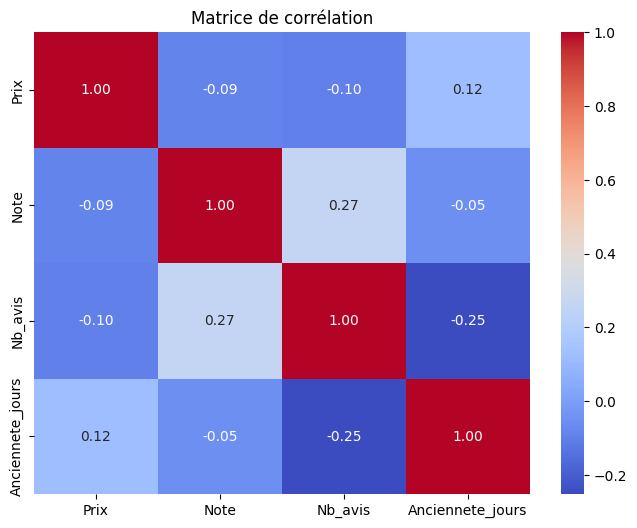

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [61]:
df['Nb_avis'] = df['Nb_avis'].astype(int)

In [62]:
df.head()

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock,Anciennete_jours
0,236017 BOUILLOIRE 1.7L NOIR 2200W,135.99,Électroménager,3.8,24,Oui,120
1,8 port 10/100Base-T unmanged switch (plastic c...,44.90,Informatique,4.2,54,Oui,60
2,AFFECT,32.00,Beauté,4.6,61,Oui,30
3,AIRVAL,88.00,Beauté,4.5,41,Oui,31
4,ANASTASIA BEVERLY HILLS,156.00,Beauté,4.2,70,Oui,32


In [65]:
df['En_stock'] = df['En_stock'].apply(lambda x: 1 if str(x).lower() == 'oui' else 0)

In [ ]:
Creation colonne vente rapide 

In [66]:
import pandas as pd
import numpy as np
df['Vente_rapide'] = np.where(
    (df['Note'] >= 4.5) & (df['Nb_avis'] >= 50) & (df['Anciennete_jours'] <= 60), 1, 0
)
print(df[['Nom','Note','Nb_avis','Anciennete_jours','Vente_rapide']].head(10))


                                                 Nom  Note  Nb_avis  \
0                  236017 BOUILLOIRE 1.7L NOIR 2200W   3.8       24   
1  8 port 10/100Base-T unmanged switch (plastic c...   4.2       54   
2                                             AFFECT   4.6       61   
3                                             AIRVAL   4.5       41   
4                            ANASTASIA BEVERLY HILLS   4.2       70   
5                                             ARMANI   4.6       61   
6                                       ARMANI PRIVÉ   4.6       66   
7                                              ASMIN   4.4       49   
8          ASPIRATEUR A MAIN BLACK & DECKER NVC215WA   4.4       24   
9             ASPIRATEUR BALAI ELECTROLUX ES52B21GRN   3.9        5   

   Anciennete_jours  Vente_rapide  
0               120             0  
1                60             0  
2                30             1  
3                31             0  
4                32             0  
5 

In [68]:
df.head()

,Nom,Prix,Catégorie,Note,Nb_avis,En_stock,Anciennete_jours,Vente_rapide
0,236017 BOUILLOIRE 1.7L NOIR 2200W,135.99,Électroménager,3.8,24,1,120,0
1,8 port 10/100Base-T unmanged switch (plastic c...,44.90,Informatique,4.2,54,1,60,0
2,AFFECT,32.00,Beauté,4.6,61,1,30,1
3,AIRVAL,88.00,Beauté,4.5,41,1,31,0
4,ANASTASIA BEVERLY HILLS,156.00,Beauté,4.2,70,1,32,0


In [ ]:
categorisation du donnee (colonne categorie esta3eml la methode HOT ENCODING)

In [69]:
df_encoded = pd.get_dummies(df, columns=['Catégorie'], prefix='Cat')

In [ ]:
bech nkamlou ne5demou bel df_encoded 5ater el df andha dataset original alors que df encoded hiya el dataset eli hathra rouha lil model 

In [71]:
df_encoded.head()

,Nom,Prix,Note,Nb_avis,En_stock,Anciennete_jours,Vente_rapide,Cat_Beauté,Cat_Informatique,Cat_Téléphonie,Cat_Électroménager
0,236017 BOUILLOIRE 1.7L NOIR 2200W,135.99,3.8,24,1,120,0,False,False,False,True
1,8 port 10/100Base-T unmanged switch (plastic c...,44.90,4.2,54,1,60,0,False,True,False,False
2,AFFECT,32.00,4.6,61,1,30,1,True,False,False,False
3,AIRVAL,88.00,4.5,41,1,31,0,True,False,False,False
4,ANASTASIA BEVERLY HILLS,156.00,4.2,70,1,32,0,True,False,False,False


In [ ]:
taw bech nhawlou el les valeurs boolean en wehed o zero

In [72]:
category_cols = ['Cat_Beauté', 'Cat_Informatique', 'Cat_Téléphonie', 'Cat_Électroménager']
df_encoded[category_cols] = df_encoded[category_cols].astype(int)

In [73]:
df_encoded.head()

,Nom,Prix,Note,Nb_avis,En_stock,Anciennete_jours,Vente_rapide,Cat_Beauté,Cat_Informatique,Cat_Téléphonie,Cat_Électroménager
0,236017 BOUILLOIRE 1.7L NOIR 2200W,135.99,3.8,24,1,120,0,0,0,0,1
1,8 port 10/100Base-T unmanged switch (plastic c...,44.90,4.2,54,1,60,0,0,1,0,0
2,AFFECT,32.00,4.6,61,1,30,1,1,0,0,0
3,AIRVAL,88.00,4.5,41,1,31,0,1,0,0,0
4,ANASTASIA BEVERLY HILLS,156.00,4.2,70,1,32,0,1,0,0,0


In [ ]:
Seperation les variables (variables features et le variable cible)

In [74]:
X = df_encoded.drop(columns=['Nom', 'Vente_rapide'])
y = df_encoded['Vente_rapide']

In [ ]:
Seperation du dataset lil trainning o el test we will go 20% test train 80%
el modele mt3 training bech ye5ou les colonne kol ken colonne nom bech mat2atherch 3lih fel trainning te3ou

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,       
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (818, 9)
X_test shape: (205, 9)


In [ ]:
awel modele bech nebdew ne5dmouh houwa el decision Tree

In [78]:
# Import des librairies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

dtree = DecisionTreeClassifier(
    criterion='gini',     
    max_depth=None,        
    random_state=42
)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00         3

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[202   0]
 [  0   3]]


In [79]:
from sklearn.utils import resample

# Combine X_train and y_train to make resampling easier
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data['Vente_rapide'] == 0]
minority = train_data[train_data['Vente_rapide'] == 1]

# Upsample minority class
minority_upsampled = resample(
    minority,
    replace=True,            # duplicate existing samples
    n_samples=len(majority), # match number of majority samples
    random_state=42
)

# Combine back
train_upsampled = pd.concat([majority, minority_upsampled])
X_train_balanced = train_upsampled.drop('Vente_rapide', axis=1)
y_train_balanced = train_upsampled['Vente_rapide']


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(
    max_depth=5,          
    min_samples_leaf=5,   
    random_state=42
)
clf.fit(X_train_balanced, y_train_balanced)

y_pred = clf.predict(X_test)


In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       0.75      1.00      0.86         3

    accuracy                           1.00       205
   macro avg       0.88      1.00      0.93       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[201   1]
 [  0   3]]


In [ ]:
Random forest

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00         3

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[202   0]
 [  0   3]]


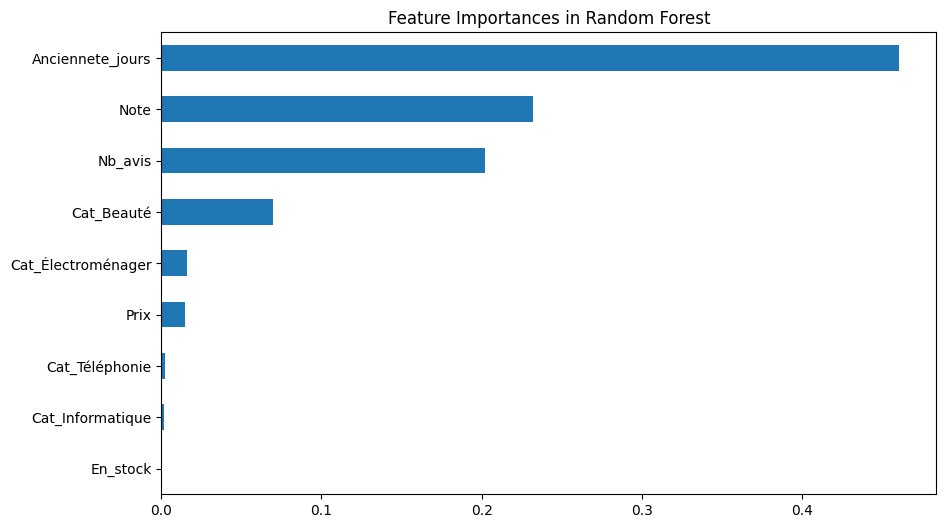

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf_clf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=5,            # limit depth for generalization
    min_samples_leaf=5,     # minimum samples per leaf
    class_weight='balanced',# handle imbalance
    random_state=42
)

rf_clf.fit(X_train_balanced, y_train_balanced)
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train_balanced.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances in Random Forest")
plt.show()
